In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplcursors
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [40]:
df = pd.read_csv('../Inflation vs Gold vs WTI vs Brent/Inflation Rates Percent.csv')
df.head()

,Date,Percent
0,1/1/2023,6.4
1,2/1/2023,6.0
2,3/1/2023,5.0
3,4/1/2023,4.9
4,5/1/2023,4.0


In [41]:
df = pd.read_csv('../Inflation vs Gold vs WTI vs Brent/Gold-WTI-Brent.csv')
df.head()

,Date,GOLD,WTI,BRENT
0,8/4/2023,1939.0,82.34,85.90
1,8/3/2023,1932.0,81.55,85.14
2,8/2/2023,1937.4,79.49,83.20
3,8/1/2023,1940.7,81.37,84.91
4,7/31/2023,1970.5,81.80,85.56


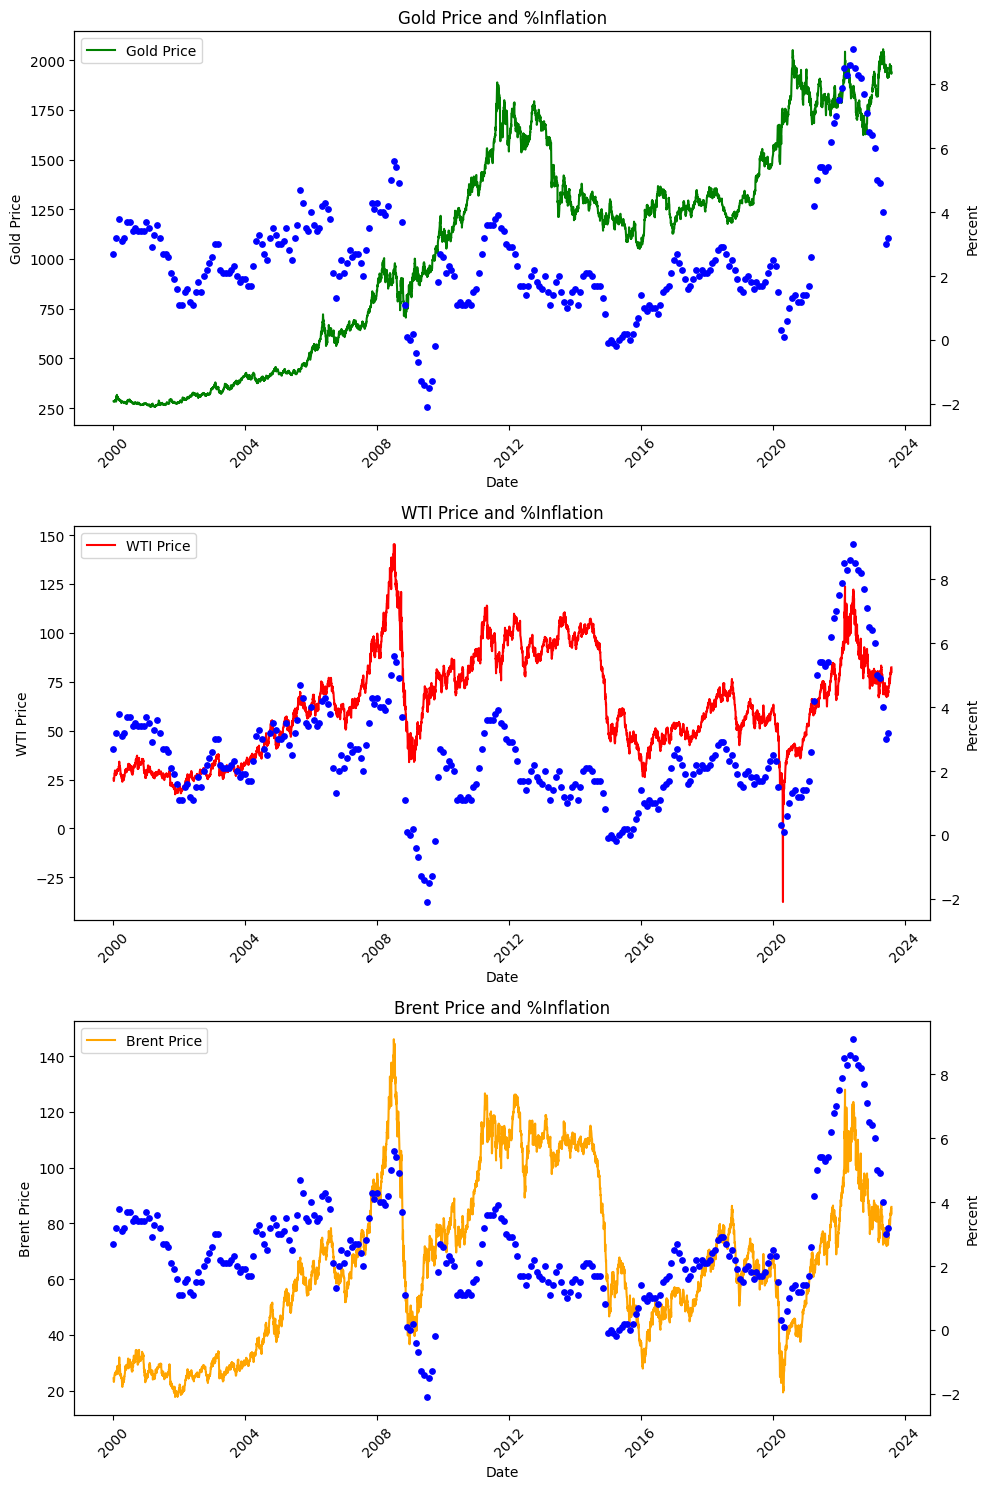

In [44]:
df = pd.read_csv('../Inflation vs Gold vs WTI vs Brent/Gold-WTI-Brent.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  

df2 = pd.read_csv('../Inflation vs Gold vs WTI vs Brent/Inflation Rates Percent.csv')   

df2['Date'] = pd.to_datetime(df2['Date'], format='%m/%d/%Y')

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].plot(df['Date'], df['GOLD'], color='green', label='Gold Price')
axs[0].set_ylabel('Gold Price')

axs2_0 = axs[0].twinx()
axs2_0.scatter(df2['Date'], df2['Percent'], color='blue', label='%Inflation', marker='o', s=15)
axs2_0.set_ylabel('Percent')

axs[1].plot(df['Date'], df['WTI'], color='red', label='WTI Price')
axs[1].set_ylabel('WTI Price')

axs2_1 = axs[1].twinx()
axs2_1.scatter(df2['Date'], df2['Percent'], color='blue', label='%Inflation', marker='o', s=15)
axs2_1.set_ylabel('Percent')

axs[2].plot(df['Date'], df['BRENT'], color='orange', label='Brent Price')
axs[2].set_ylabel('Brent Price')

axs2_2 = axs[2].twinx()
axs2_2.scatter(df2['Date'], df2['Percent'], color='blue', label='%Inflation', marker='o', s=15)
axs2_2.set_ylabel('Percent')

for i, ax in enumerate(axs):
    ax.set_xlabel('Date')
    ax.set_title(f'{["Gold", "WTI", "Brent"][i]} Price and %Inflation')
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = axs[i].get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1, loc='upper left')

for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.xaxis.set_tick_params(rotation=45)
    
date_format = mdates.DateFormatter("%Y")
for ax in axs:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()
